In [15]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
# Charger les données depuis le fichier CSV
chemin_fichier = './data/transformed_data.csv'
data = pd.read_csv(chemin_fichier)

In [17]:
# Aperçu des données
print("Aperçu des données :\n", data.head())

Aperçu des données :
   Index         PAO        PAA         VIO         VIA        POT        LEC  \
0  AGRI  167.167666   1.370000  162.740161   23.093603  40.954133   7.897569   
1  SAAG  162.168585   2.202318  140.814126   12.330000  39.954498  11.875952   
2  PRIN  119.176494   6.011267   69.056197   56.002902  38.954863   4.913782   
3  CSUP   87.490000  10.500000   63.470000  110.790000  27.270000   2.950000   
4  CMOY  103.179437   5.059030   68.059559   76.945183  31.957418   3.919186   

         RAI        PLP  
0   6.178826   5.670046  
1   4.190000  14.731248  
2  13.172333  40.620000  
3  17.970000  38.894453  
4  11.174188  29.833251  


In [18]:
# Calculer les indicateurs statistiques
statistiques = data.describe().loc[['min', 'max', 'mean', 'std']].T

# Renommer les colonnes pour correspondre aux termes en français
statistiques.columns = ['Minimum', 'Maximum', 'Moyenne', 'Écart-type']

# Afficher le tableau des indicateurs statistiques
print("Indicateurs statistiques :\n", statistiques)


Indicateurs statistiques :
        Minimum     Maximum     Moyenne  Écart-type
PAO  87.490000  167.167666  127.338452   27.836951
PAA   1.370000   10.500000    4.920933    2.934740
VIO  63.470000  162.740161   96.139204   38.612201
VIA  12.330000  110.790000   58.888054   31.171281
POT  27.270000   52.949753   38.618845    7.804947
LEC   2.950000   11.875952    6.533176    2.805353
RAI   4.190000   17.970000   10.276453    4.398496
PLP   5.670046   40.620000   24.133993   12.274433


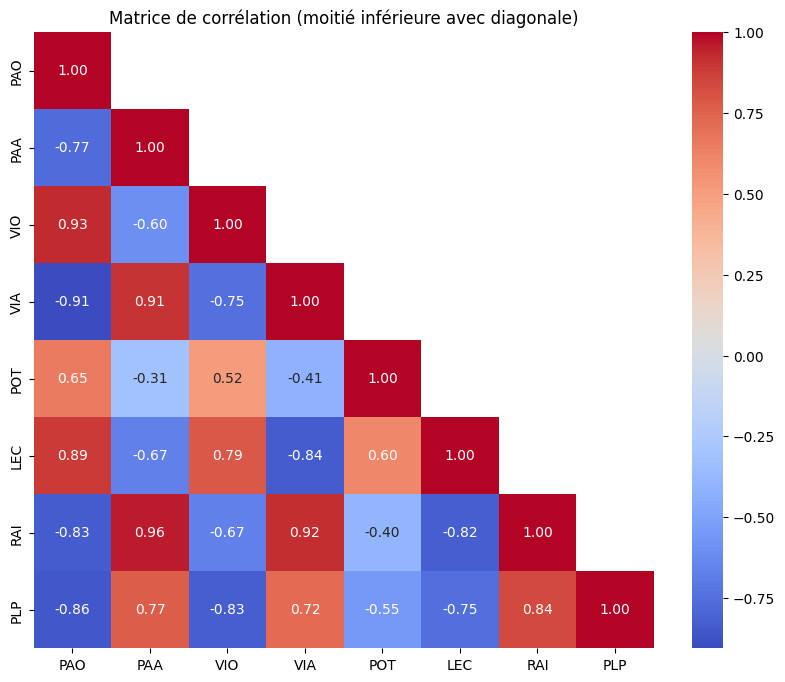

In [19]:
# Calcul de la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Création d'un masque pour la moitié supérieure (exclut les éléments strictement au-dessus de la diagonale)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Création de la heatmap avec la diagonale incluse
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matrice de corrélation (moitié inférieure avec diagonale)')
plt.show()


In [20]:
# Standardiser les données
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Appliquer PCA sur les données standardisées
pca = PCA()
pca.fit(numeric_data_scaled)

# Valeurs propres et variance expliquée
valeurs_propres = pca.explained_variance_
variance_expliquee = pca.explained_variance_ratio_ * 100  
variance_cumulee = np.cumsum(variance_expliquee) 

# Créer un tableau avec les résultats
resultats_pca = pd.DataFrame({
    'N°': np.arange(1, len(valeurs_propres) + 1),
    'Valeur Propre': np.round(valeurs_propres, 4), 
    'Pour-cent': np.round(variance_expliquee, 3),   
    'Cumul': np.round(variance_cumulee, 3)         
})

# Afficher le tableau des résultats
print(resultats_pca)


   N°  Valeur Propre  Pour-cent    Cumul
0   1         7.0873     77.518   77.518
1   2         1.0277     11.240   88.758
2   3         0.4684      5.123   93.881
3   4         0.3467      3.792   97.673
4   5         0.1896      2.073   99.746
5   6         0.0193      0.211   99.957
6   7         0.0039      0.043  100.000
7   8         0.0000      0.000  100.000


C:\Users\Kahla\AppData\Local\Temp\ipykernel_3200\1217391007.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (mirrored_individuals_table['PC1'][i], mirrored_individuals_table['PC2'][i]), fontsize=9)


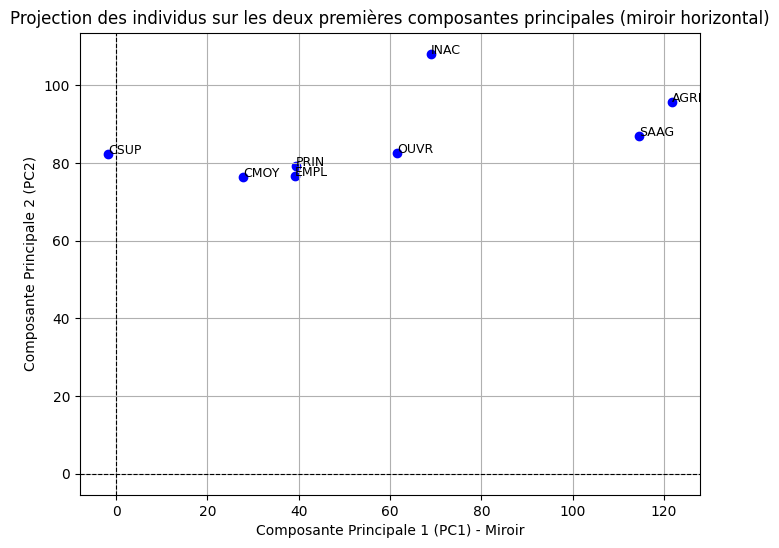

In [ ]:
# Création d'un DataFrame pour les individus avec leurs coordonnées sur les deux premières composantes
mirrored_individuals_table = individuals_table.copy()
mirrored_individuals_table['PC1'] = -mirrored_individuals_table['PC1']

# Affichage des individus sur le plan des deux premières composantes (miroir horizontal)
plt.figure(figsize=(8, 6))
plt.scatter(mirrored_individuals_table['PC1'], mirrored_individuals_table['PC2'], color='blue', marker='o')

# Annoter les individus sur le graphique
for i, txt in enumerate(mirrored_individuals_table.index):
    plt.annotate(txt, (mirrored_individuals_table['PC1'][i], mirrored_individuals_table['PC2'][i]), fontsize=9)

# Ajouter des labels et un titre
plt.xlabel('Composante Principale 1 (PC1) - Miroir')
plt.ylabel('Composante Principale 2 (PC2)')
plt.title('Projection des individus sur les deux premières composantes principales')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.show()
